In [42]:
##PREDICTION GPA USE Linear Regression model

In [12]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [11]:
df = pd.read_csv('Student_performance_data _.csv')
df.head()


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [4]:
df.shape

(2392, 15)

In [8]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [12]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [14]:
print(df.isnull().sum())

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


In [58]:
df.nunique()

StudentID            2392
Age                     4
Gender                  2
Ethnicity               4
ParentalEducation       5
StudyTimeWeekly      2392
Absences               30
Tutoring                2
ParentalSupport         5
Extracurricular         2
Sports                  2
Music                   2
Volunteering            2
GPA                  2371
GradeClass              5
dtype: int64

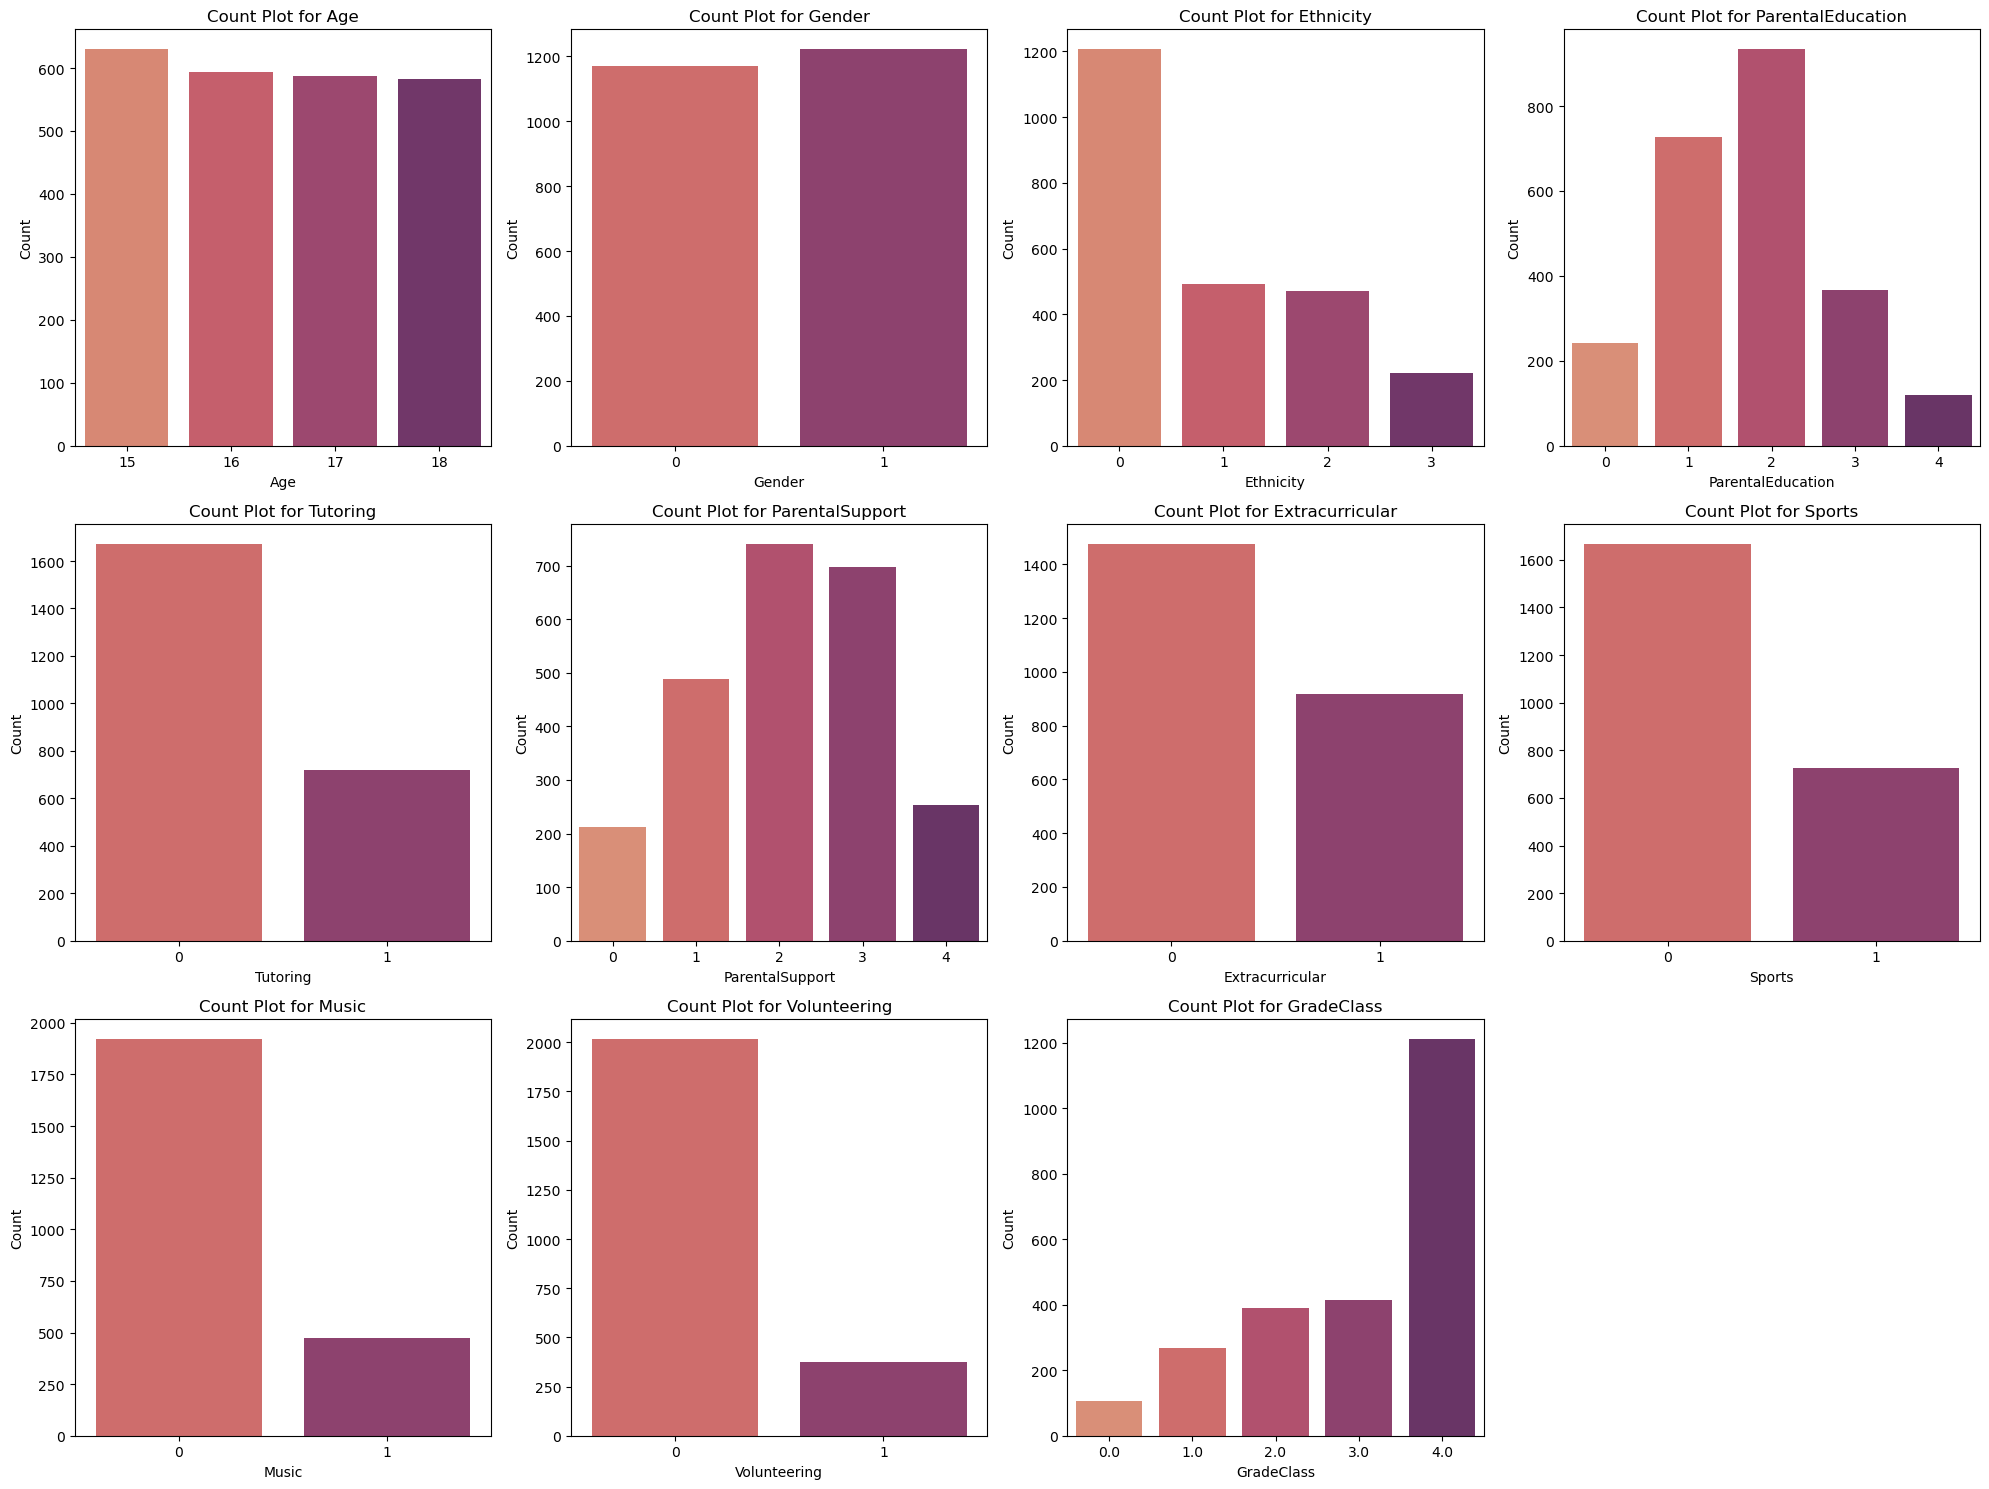

In [16]:
#vẽ biểu đồ bar
countplots = df.drop(columns=['Absences', 'StudyTimeWeekly','GPA','StudentID'])
columns = countplots.columns

fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
axs = ax.flatten()

for i, column in enumerate(columns):
    sns.countplot(x=column, data=df, ax=axs[i], palette='flare')
    axs[i].set_title(f'Count Plot for {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Count')

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


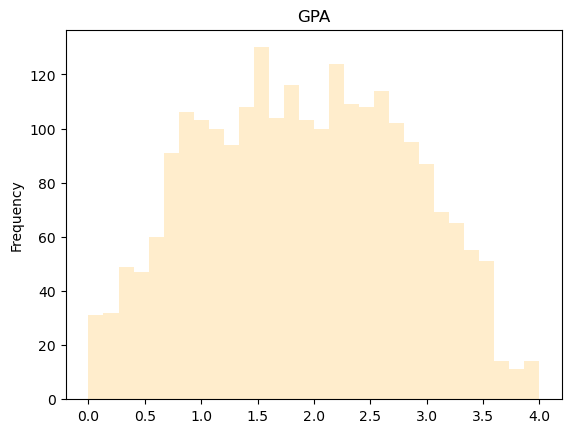

In [26]:
df.loc[:,'GPA'].plot.hist(bins=30,color='orange',alpha=0.2,title='GPA')

plt.show()

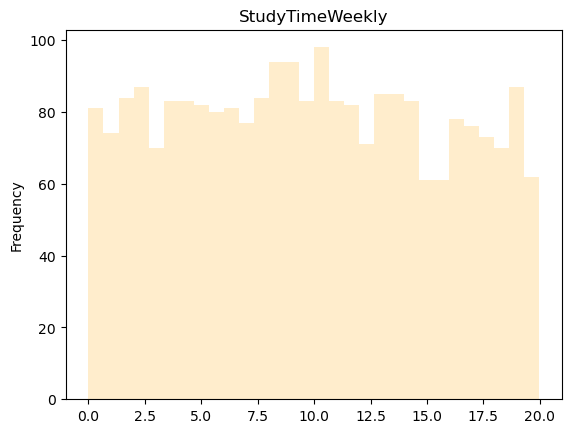

In [28]:
df.loc[:,'StudyTimeWeekly'].plot.hist(bins=30,color='orange',alpha=0.2,title='StudyTimeWeekly')

plt.show()

In [18]:
#Tính hệ số tương quan các thuộc tính
corr_matrix = df.corr()
corr_matrix

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
StudentID,1.000000,-0.042255,-0.014625,-0.012990,-0.002307,0.026976,0.014841,-0.007834,0.003016,-0.003611,-0.020703,-0.005468,0.008011,-0.002697,-0.098500
Age,-0.042255,1.000000,0.044895,-0.028473,0.025099,-0.006800,-0.011511,-0.012076,0.033197,-0.025061,-0.046320,-0.003492,0.013074,0.000275,-0.006250
Gender,-0.014625,0.044895,1.000000,0.016010,0.006771,0.011469,0.021479,-0.031597,0.008065,-0.005964,-0.008897,0.007109,-0.000200,-0.013360,0.022998
Ethnicity,-0.012990,-0.028473,0.016010,1.000000,0.033595,0.007184,-0.025712,-0.017440,0.020922,-0.008927,-0.004484,-0.014627,0.013468,0.027760,-0.023326
ParentalEducation,-0.002307,0.025099,0.006771,0.033595,1.000000,-0.011051,0.036518,-0.017340,-0.017463,0.007479,0.002029,0.039439,0.011960,-0.035854,0.041031
StudyTimeWeekly,0.026976,-0.006800,0.011469,0.007184,-0.011051,1.000000,0.009326,0.028930,0.035800,-0.022860,0.006836,0.007791,-0.016604,0.179275,-0.134131
Absences,0.014841,-0.011511,0.021479,-0.025712,0.036518,0.009326,1.000000,-0.015534,0.002108,0.000360,0.041454,-0.008692,-0.018528,-0.919314,0.728633
Tutoring,-0.007834,-0.012076,-0.031597,-0.017440,-0.017340,0.028930,-0.015534,1.000000,-0.000824,0.004865,0.006278,-0.011385,-0.050898,0.145119,-0.111695
ParentalSupport,0.003016,0.033197,0.008065,0.020922,-0.017463,0.035800,0.002108,-0.000824,1.000000,-0.008381,-0.006176,0.035122,-0.006036,0.190774,-0.136823
Extracurricular,-0.003611,-0.025061,-0.005964,-0.008927,0.007479,-0.022860,0.000360,0.004865,-0.008381,1.000000,-0.011820,-0.014191,-0.007427,0.094078,-0.069733


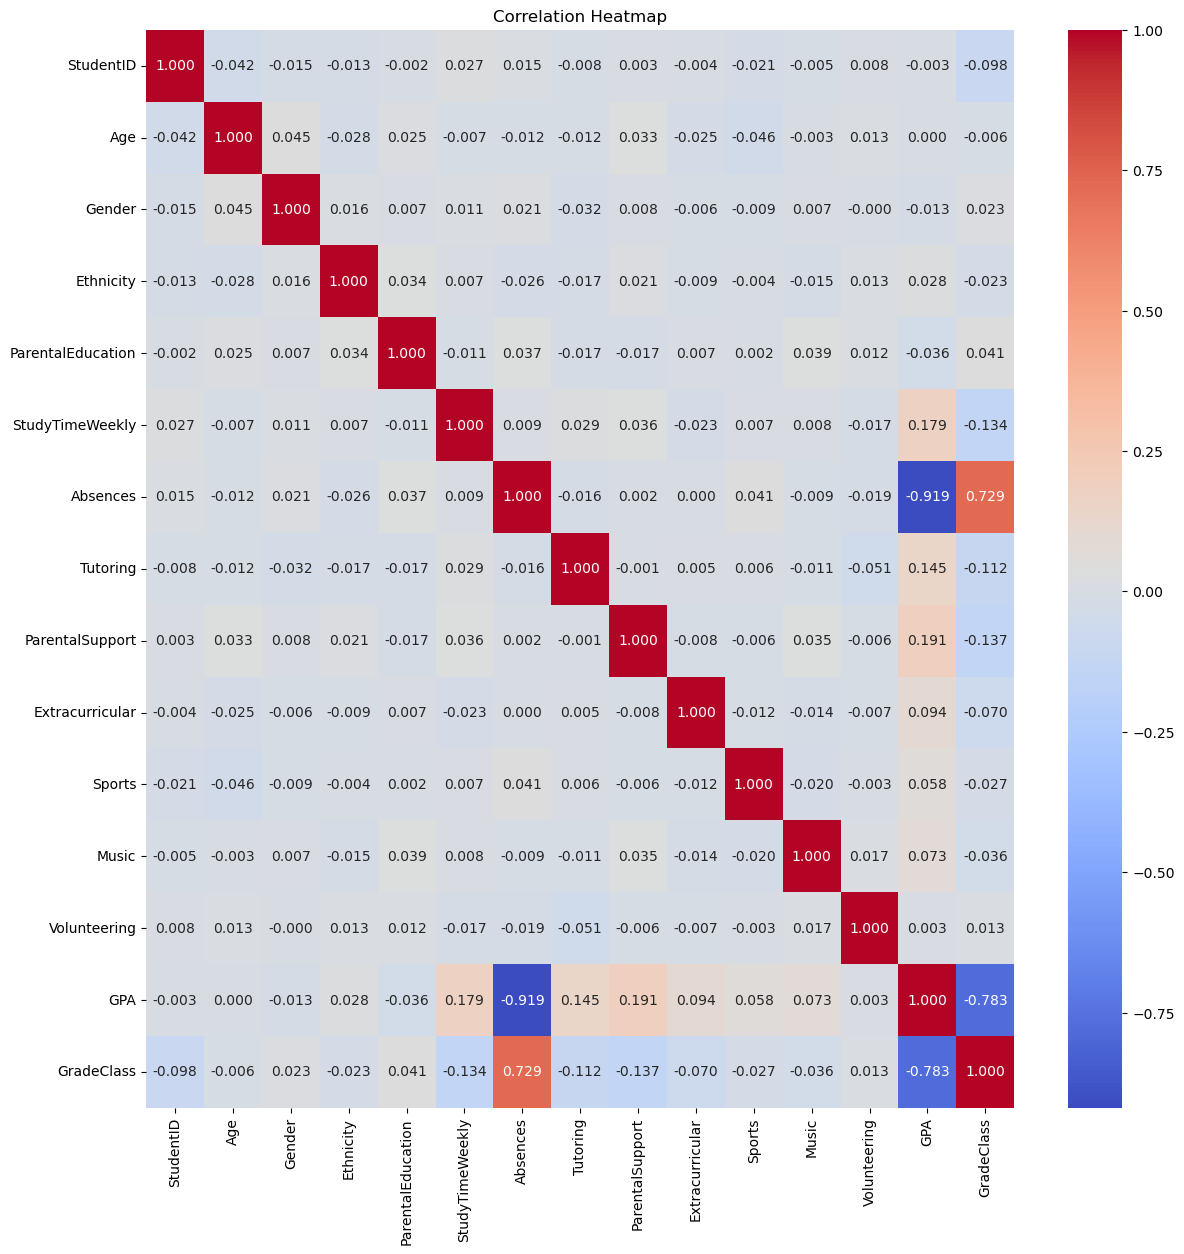

In [20]:
#biểu đồ heatmap
plt.figure(figsize=(14, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Correlation Heatmap')
plt.show()

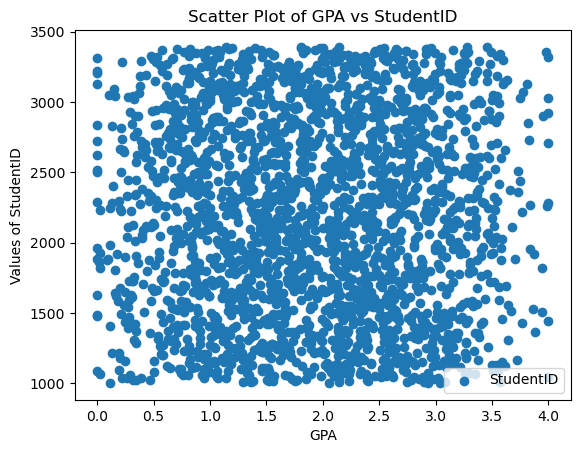

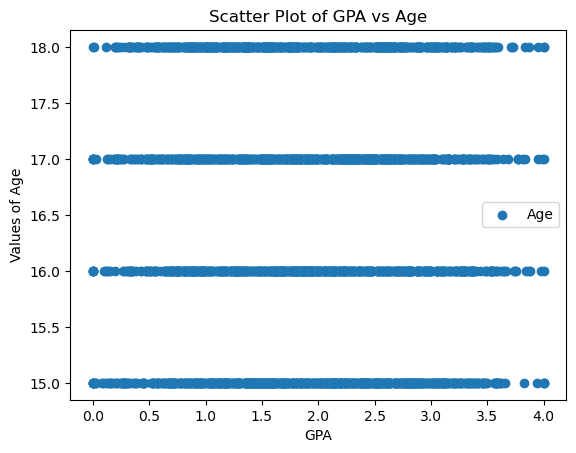

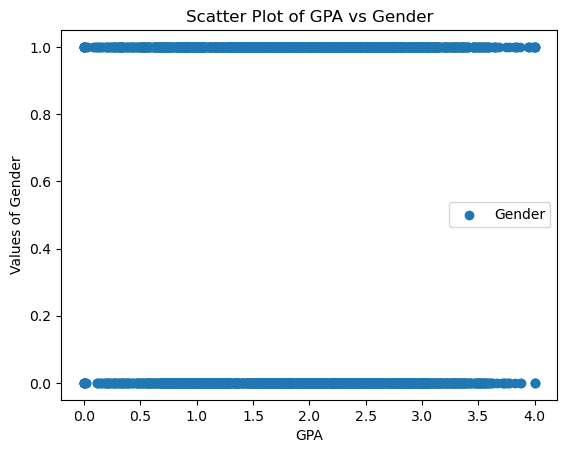

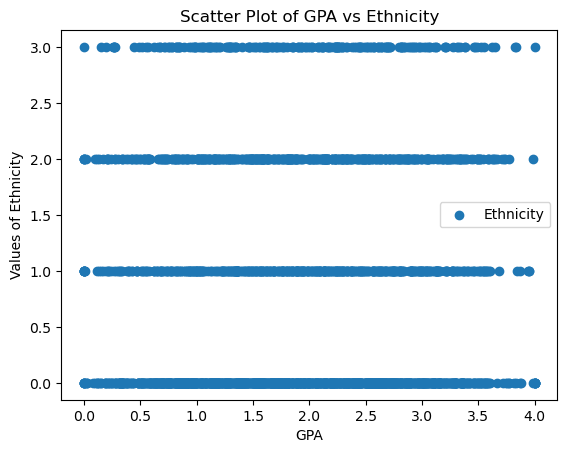

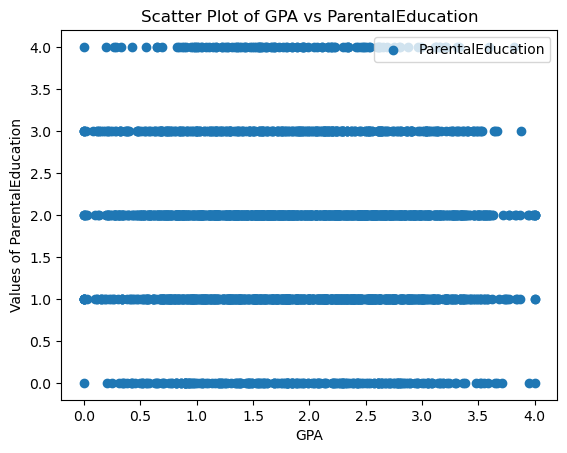

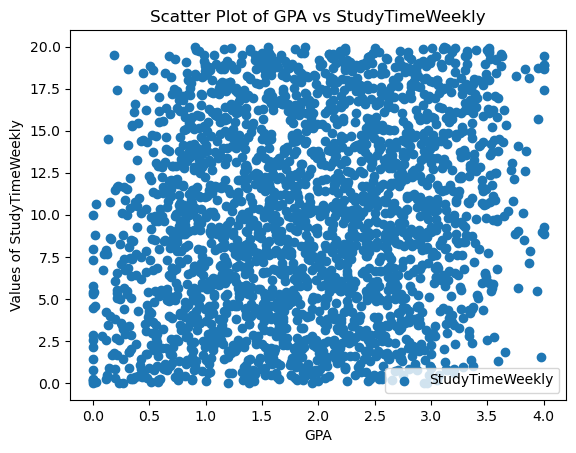

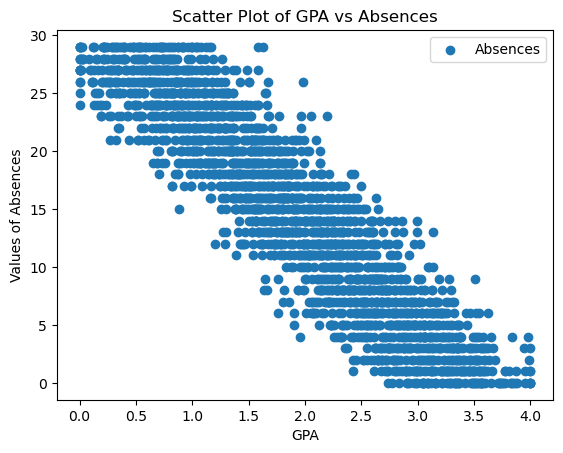

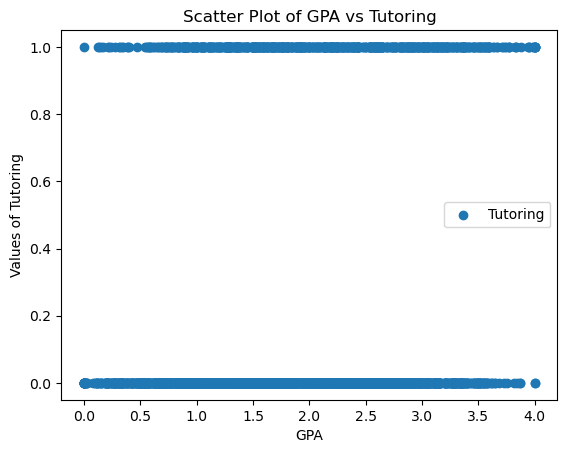

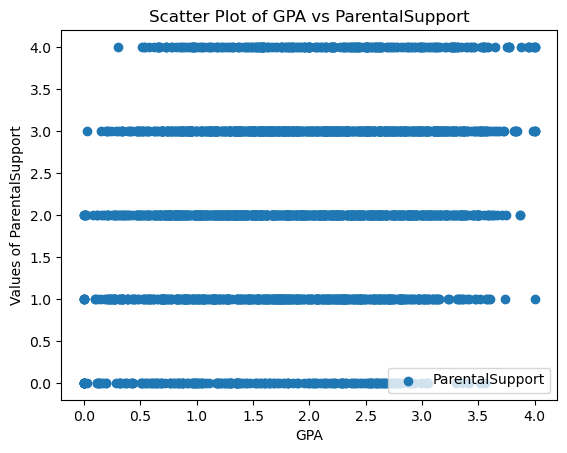

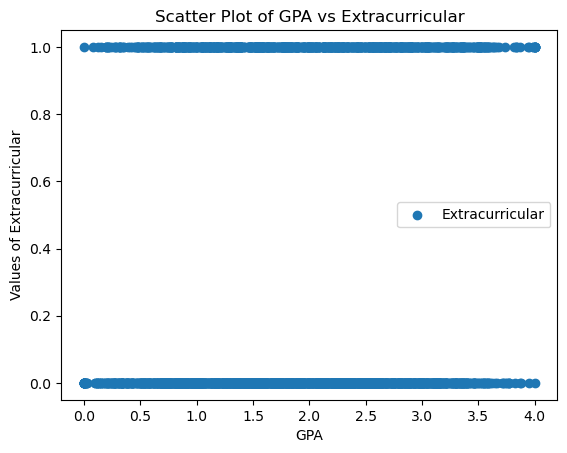

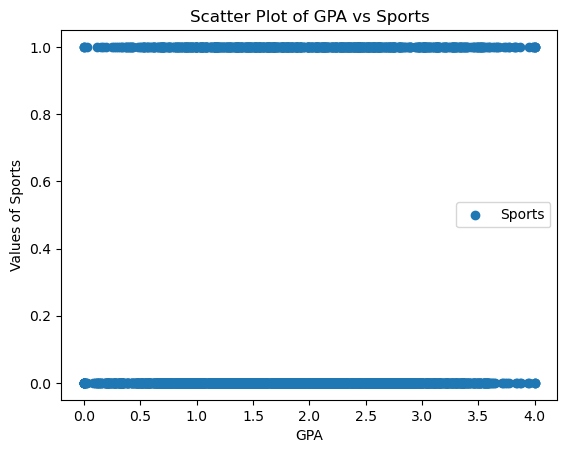

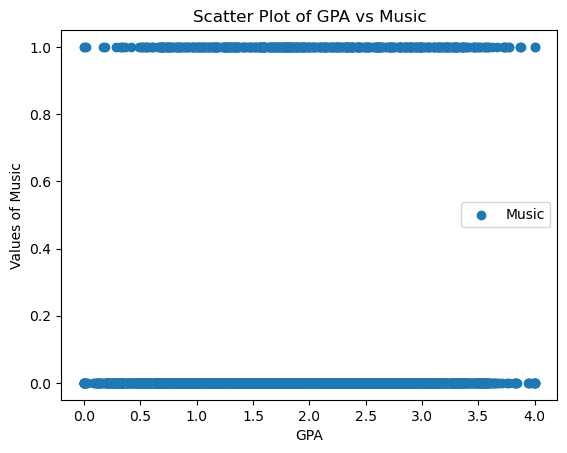

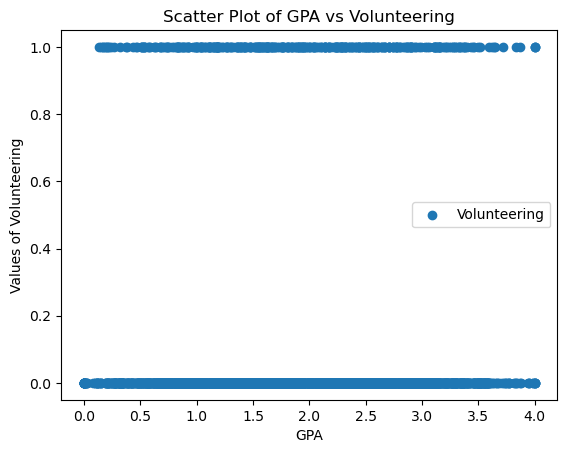

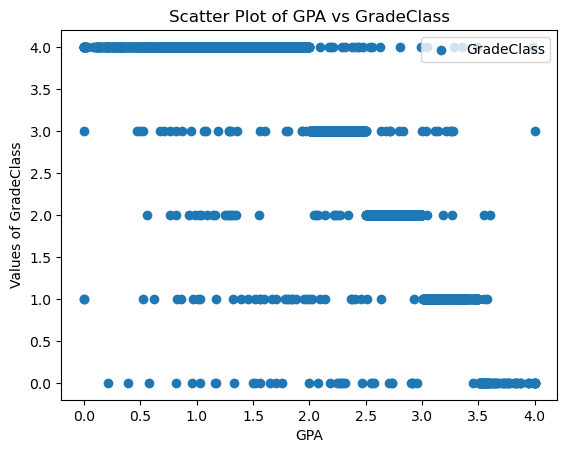

In [38]:


# Vẽ biểu đồ scatter
for column in df.columns:
    if column != 'GPA':
        plt.scatter(df['GPA'], df[column], label=column)
        
        plt.title(f'Scatter Plot of GPA vs {column}')
        plt.xlabel('GPA')
        plt.ylabel(f'Values of {column}')
        plt.legend()
        plt.show()

In [32]:
df.head()


,Age,Gender,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
0,17,1,2,19.833723,7,1,2,0,0,1,0,2.0
1,18,0,1,15.408756,0,0,1,0,0,0,0,1.0
2,15,0,3,4.210570,26,0,2,0,0,0,0,4.0
3,17,1,3,10.028829,14,0,3,1,0,0,0,3.0
4,17,1,2,4.672495,17,1,3,0,0,0,0,4.0


In [44]:
#Chia tệp huấn luyện(bỏ StudentID, Ethnicity(vì không liên quan đến GPA),bỏ GradeClass vì GPA quyết định GradeClass  )
x = df.drop(columns= ['StudentID', 'Ethnicity', 'GPA','GradeClass'])
y = df['GPA']

from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=101)

In [46]:
from sklearn.linear_model import LinearRegression
# Initialize the Linear Regression model
linreg = LinearRegression()

# Fit the model to the training data
linreg.fit(x_train, y_train)

# Predict the target variable for the test set
y_pred_lreg = linreg.predict(x_test)
print(y_pred_lreg)

[ 3.249739    2.76463941  1.62912935  2.09755856  1.64234504  2.50777119
  3.32892365  2.23501713  1.04387744  2.140896    1.01933008  2.21878736
  2.65994103  2.45980777  2.01821203  3.56462265  1.64668741  2.07583255
  2.81505463  3.0299892   1.07458317  1.3254424   2.7979476   0.98470839
  2.59667361  1.02100338  2.24919829  1.77915669  1.30556343  3.24165679
  2.38000177  3.14919179  2.97392005  2.4022506   2.15338888  3.36622308
  0.48974253  2.77524855  1.71061391  0.56153981  1.15645357  0.74852182
  3.13395947  1.25222258  2.88354929  3.20901818  3.18749722  3.42302321
  2.85955637  1.56023706  1.02102392 -0.06607222  3.06475826  2.4894148
  2.46510883  2.80155725  1.08167747  3.01975134  3.22727174  1.29175415
  1.48951264  2.5421227   2.69267343  3.03827345  3.26274681  3.22229264
  3.66797781  1.07174691  1.47708732  1.53173182  3.12484626  2.07977207
  2.10027917  2.25373071  1.47129788  2.61801989  0.7639355   0.68844977
  2.55809998  0.75963424  0.87140489  1.4591279   1.

In [48]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred_lreg)
print('Mean Squared Error:', mse)

# Calculate the R-squared value
r2 = r2_score(y_test, y_pred_lreg)
print('R-squared:', r2)

Mean Squared Error: 0.03897224208858529
R-squared: 0.9540115569878636
